Title: Uber Data Analysis<br>
Name: Sanket Sandip Kulkarni<br>

Link to dataset: https://www.kaggle.com/code/manishadhikari18/cab-fare-price-analysis

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [65]:
cab_df = pd.read_csv(r'/content/cab_rides.csv')
weather_df = pd.read_csv(r'/content/weather.csv')

In [66]:
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [67]:
cab_df.shape

(483032, 10)

In [68]:
cab_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [69]:
cab_df.describe()

,distance,time_stamp,price,surge_multiplier
count,483032.00000,4.830320e+05,444758.000000,483032.000000
mean,2.19007,1.544043e+12,16.551476,1.014023
std,1.14076,6.886325e+08,9.335594,0.092094
min,0.02000,1.543200e+12,2.500000,1.000000
25%,1.27000,1.543440e+12,9.000000,1.000000
50%,2.16000,1.543730e+12,13.500000,1.000000
75%,2.93000,1.544820e+12,22.500000,1.000000
max,7.62000,1.545160e+12,92.000000,3.000000


In [70]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483032 entries, 0 to 483031
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          483032 non-null  float64
 1   cab_type          483032 non-null  object 
 2   time_stamp        483032 non-null  float64
 3   destination       483032 non-null  object 
 4   source            483032 non-null  object 
 5   price             444758 non-null  float64
 6   surge_multiplier  483032 non-null  float64
 7   id                483032 non-null  object 
 8   product_id        483032 non-null  object 
 9   name              483031 non-null  object 
dtypes: float64(4), object(6)
memory usage: 36.9+ MB


In [71]:
cab_df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               38274
surge_multiplier        0
id                      0
product_id              0
name                    1
dtype: int64

In [72]:
weather_df.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [73]:
weather_df.shape

(6276, 8)

In [74]:
weather_df.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [75]:
weather_df.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [76]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [77]:
weather_df.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [78]:
import datetime
cab_df['datetime'] = pd.to_datetime(cab_df['time_stamp'])

weather_df['datetime'] = pd.to_datetime(weather_df['time_stamp'])

In [79]:
df = pd.concat([cab_df, weather_df])

In [80]:
df.shape

(489308, 18)

In [81]:
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour

In [82]:
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1,0
6272,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1,0
6273,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1,0
6274,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1,0
6275,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1,0


In [83]:
df.fillna(0, inplace=True)

In [84]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.950,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.460,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0


In [85]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [86]:
df.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272,215272
Uber,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760,267760


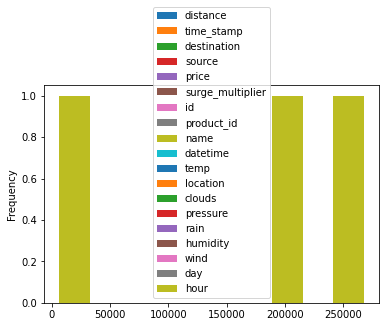

In [87]:
df.groupby('cab_type').count().plot.hist()

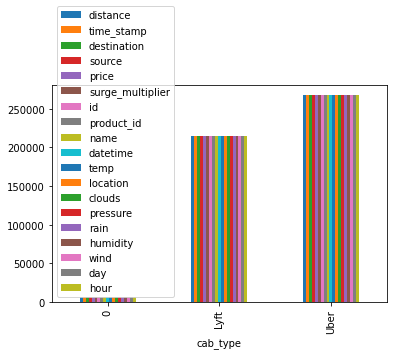

In [88]:
df.groupby('cab_type').count().plot.bar()

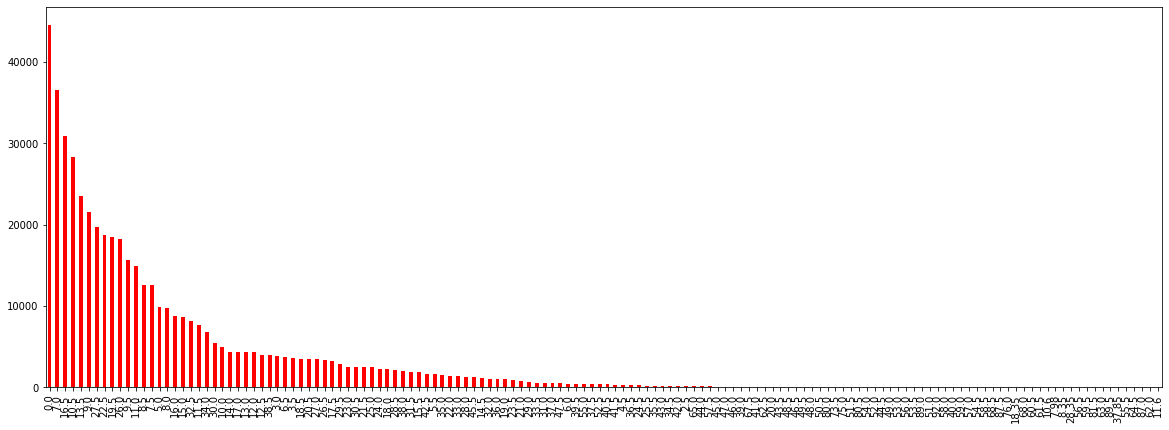

In [89]:
df['price'].value_counts().plot(kind='bar', figsize=(20,7), color='red')

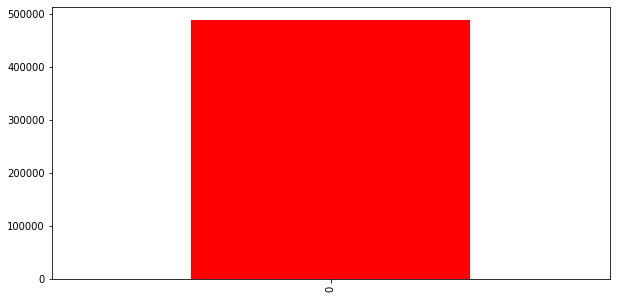

In [104]:
df['hour'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

In [91]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [92]:
x1=df[['distance','surge_multiplier','temp','clouds', 'pressure', 'rain', 'humidity', 'wind', 'day','hour']]
y1=df['price']

In [93]:
from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test = train_test_split(x1,y1, train_size= 0.75, random_state=30)

In [94]:
model1=LinearRegression()
model1.fit(x_train, x_test)

LinearRegression()

In [95]:
prediction1 = model1.predict(y_train)

In [96]:
result1 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction1})
result1
# Use tuning techniques for better accuracy

,Actual,Predicted
275821,24.0,17.164716
330519,0.0,11.847725
367060,9.0,13.196053
94617,31.5,20.624577
406974,17.0,16.096230
...,...,...
306876,13.5,20.166654
45222,10.5,17.953361
468734,22.5,17.088396
33236,9.0,13.704856


In [97]:
rsquare=model1.score(x_train,x_test)
print (rsquare)

0.16271774331048883


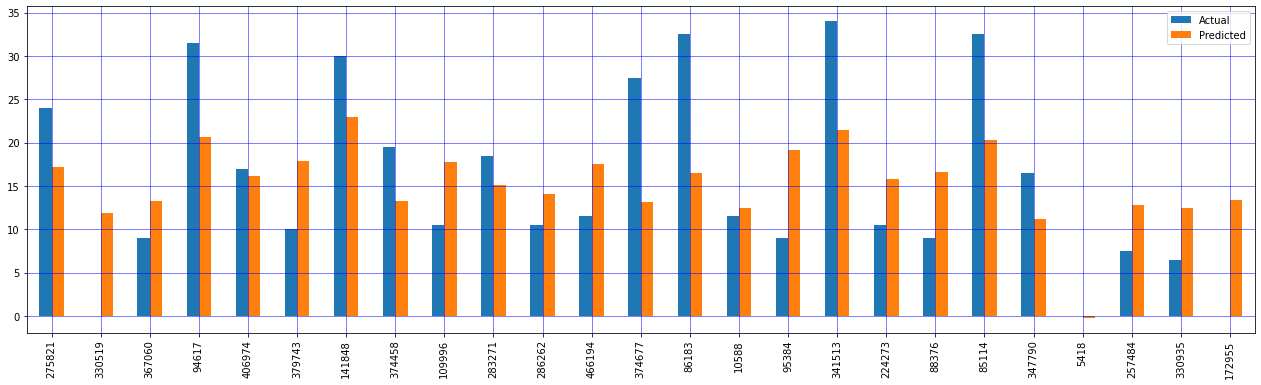

In [98]:
sample_df = result1.head(25)
sample_df.plot(kind='bar',figsize=(22,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()

In [99]:
model2=DecisionTreeRegressor()
model2.fit(x_train,x_test)

DecisionTreeRegressor()

In [100]:
prediction2 = model2.predict(y_train)

In [101]:
result2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction2})
result2

,Actual,Predicted
275821,24.0,16.649551
330519,0.0,11.686889
367060,9.0,14.513636
94617,31.5,19.799078
406974,17.0,14.735980
...,...,...
306876,13.5,23.760417
45222,10.5,16.235307
468734,22.5,16.084349
33236,9.0,15.015348


In [102]:
rsquare=model2.score(x_train,x_test)
print (rsquare)

0.186037310992743


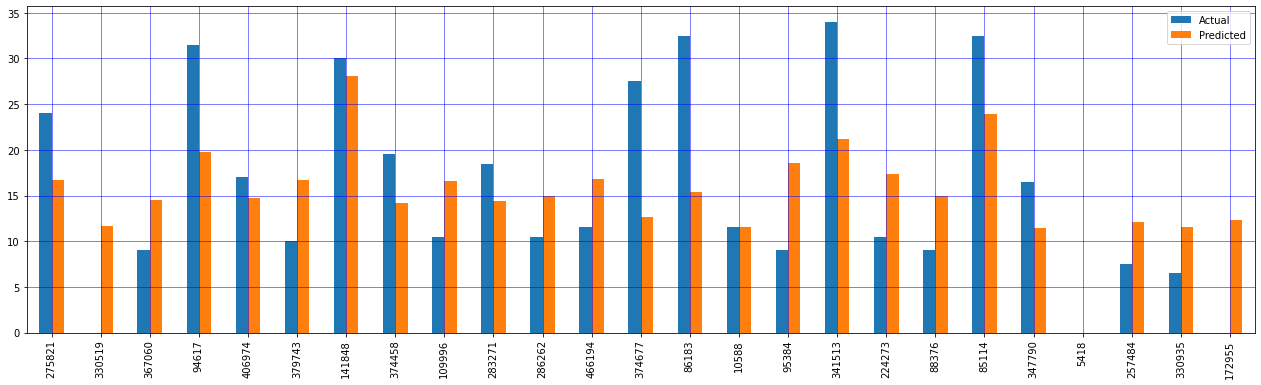

In [103]:
sample_df = result2.head(25)
sample_df.plot(kind='bar',figsize=(22,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()